<a href="https://colab.research.google.com/github/christianabusca/daanaprojekta/blob/main/DAP4_Covid_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Data Analytics Project 4 - Covid-19 Small Data**

In [23]:
# IMPORT THE LIBRARIES HERE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
covid = pd.read_csv('/content/drive/MyDrive/DataAnalyticsProject/covid_data.csv')
covid

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [3]:
# COUNTING THE NULL VALUES IN THE DATASET
covid.isnull().sum() # BASED ON THE DATA THERE ARE TOTAL OF 181 NULL VALUES IN THE STATE COLUMN

,0
Date,0
State,181
Region,0
Confirmed,0
Deaths,0
Recovered,0


In [6]:
# COUNTING THE DATA FRAME
covid.count()

,0
Date,321
State,140
Region,321
Confirmed,321
Deaths,321
Recovered,321


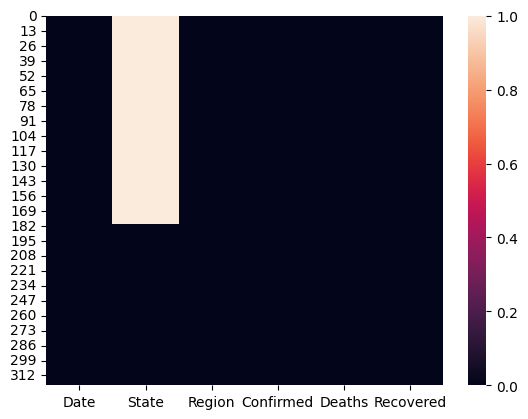

In [10]:
# USING HEATMAP IN SEABOR
heatmap = sns.heatmap(covid.isnull())
plt.show()

In [12]:
# SHOWING THE NUMBER OF CONFIRMED DEATHS AND RECOVERED CASES IN EACH REGION
# A.
set1 = covid.groupby('Region').sum().head(50)
set1

,Date,State,Confirmed,Deaths,Recovered
Region,,,,,
Afghanistan,4/29/2020,0,1939,60,252
Albania,4/29/2020,0,766,30,455
Algeria,4/29/2020,0,3848,444,1702
Andorra,4/29/2020,0,743,42,423
Angola,4/29/2020,0,27,2,7
...,...,...,...,...,...
West Bank and Gaza,4/29/2020,0,344,2,71
Western Sahara,4/29/2020,0,6,0,5
Yemen,4/29/2020,0,6,0,1


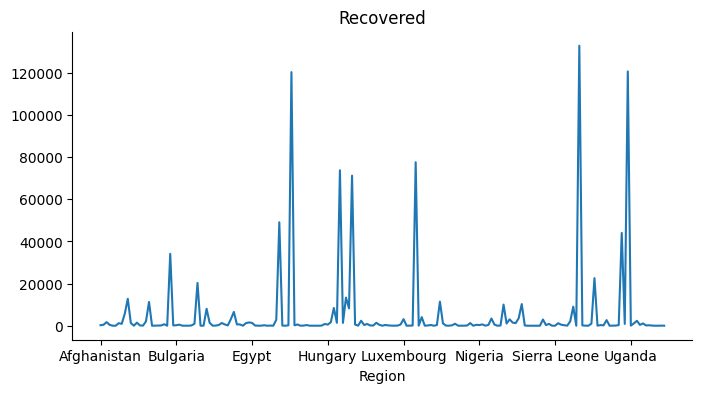

In [14]:
set1['Recovered'].plot(kind='line', figsize=(8, 4), title='Recovered')
plt.gca().spines[['top', 'right']].set_visible(False)

In [17]:
set2 = covid.groupby('Region')['Confirmed'].sum().sort_values(ascending = False).head(20)
set2

,Confirmed
Region,
US,1039909
Spain,236899
Italy,203591
France,166543
UK,166441
Germany,161539
Turkey,117589
Russia,99399
Iran,93657


In [20]:
set3 = covid.groupby('Region')[['Confirmed', 'Recovered']].sum()
set3

,Confirmed,Recovered
Region,,
Afghanistan,1939,252
Albania,766,455
Algeria,3848,1702
Andorra,743,423
Angola,27,7
...,...,...
West Bank and Gaza,344,71
Western Sahara,6,5
Yemen,6,1


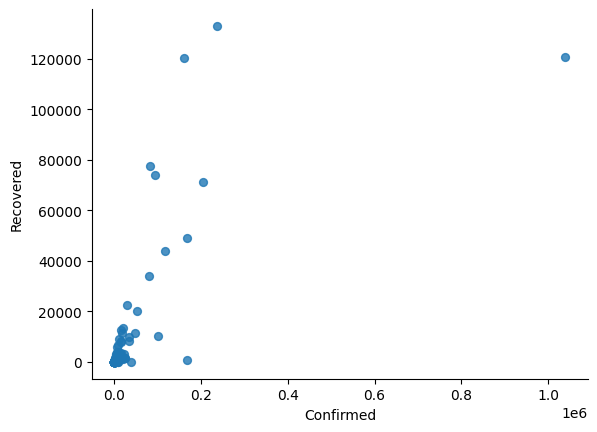

In [22]:
set3.plot(kind='scatter', x='Confirmed', y='Recovered', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [27]:
# AFTER THAT WE WILL REMOVE ALL THE RECORDS WHERE CONFIRMED CASES ARE LESS THAN 10
confirmed = covid.Confirmed < 10 # this only shows the boolean value on whether the unique id has less than 10 confirmed cases
confirmed

,Confirmed
0,False
1,False
2,False
3,False
4,False
...,...
316,False
317,False
318,False
319,False


In [32]:
confirmed = covid[covid.Confirmed < 10] # THIS SHOWS SPECIFIC ID'S THAT HAS LESS THAN 10 CONFIRMED CASES
confirmed

,Date,State,Region,Confirmed,Deaths,Recovered
18,4/29/2020,NaN,Bhutan,7,0,5
98,4/29/2020,NaN,MS Zaandam,9,2,0
105,4/29/2020,NaN,Mauritania,8,1,6
126,4/29/2020,NaN,Papua New Guinea,8,0,0
140,4/29/2020,NaN,Sao Tome and Principe,8,0,4
177,4/29/2020,NaN,Western Sahara,6,0,5
178,4/29/2020,NaN,Yemen,6,0,1
184,4/29/2020,Anguilla,UK,3,0,3
192,4/29/2020,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0
194,4/29/2020,British Virgin Islands,UK,6,1,3


In [33]:
confirmed = covid[~(covid.Confirmed < 10)] # THIS SHOWS THE OPPOSITE WHERE IT SHOWS THE CONFIRMED CASES > 10
confirmed

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [34]:
# THIS IS WHERE WE REMOVE THE CONFIRMED CASES WHICH IS LESS THAN 10
confirmed = covid[~(covid.Confirmed < 10)]
confirmed

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [36]:
# WHICH REGION HAS A MAXIMUM NUMBER OF CONFIRMED CASES WERE RECORDED?
records = covid.groupby('Region').Confirmed.sum().sort_values(ascending = False).head(20)
records

,Confirmed
Region,
US,1039909
Spain,236899
Italy,203591
France,166543
UK,166441
...,...
Sao Tome and Principe,8
Papua New Guinea,8
Bhutan,7


In [43]:
# FINDING THE MINIMUM NUMBER OF DEATHS THAT WERE RECORDED
deaths = covid.groupby('Region').Deaths.sum().sort_values(ascending=True)
deaths

,Deaths
Region,
Laos,0
Mongolia,0
Mozambique,0
Cambodia,0
Fiji,0
...,...
France,24121
Spain,24275
UK,26166


In [40]:
# LOOKING FOR THE CONFIMED, DEATHS AND RECOVERED CASES THAT WERE REPORTED FROM INDIA TILL APRIL 29, 2020
india = covid[covid.Region == 'India']
india

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


In [42]:
# LOOKING FOR THE CONFIMED, DEATHS AND RECOVERED CASES THAT WERE REPORTED FROM PHILIPPINEs TILL APRIL 29, 2020
pinas = covid[covid.Region == 'Philippines']
pinas

,Date,State,Region,Confirmed,Deaths,Recovered
129,4/29/2020,NaN,Philippines,8212,558,1023


In [44]:
# SORTING THE ENTIRE DATA WITH THE NO. OF CONFIRMED CASES
sorted = covid.sort_values(by=['Confirmed'], ascending = True)
sorted

,Date,State,Region,Confirmed,Deaths,Recovered
285,4/29/2020,Recovered,US,0,0,120720
284,4/29/2020,Recovered,Canada,0,0,20327
203,4/29/2020,Diamond Princess cruise ship,Canada,0,1,0
305,4/29/2020,Tibet,Mainland China,1,0,1
289,4/29/2020,Saint Pierre and Miquelon,France,1,0,0
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929


In [45]:
# NOW SORTING THE ENTIRE DATA WITH THE RECOVERED CASES IN DESCENDING ORDER
recover = covid.sort_values(by=['Recovered'], ascending = False)
recover

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
285,4/29/2020,Recovered,US,0,0,120720
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
...,...,...,...,...,...,...
248,4/29/2020,Maryland,US,20849,1078,0
246,4/29/2020,Manitoba,Canada,275,6,0
243,4/29/2020,Louisiana,US,27660,1845,0
241,4/29/2020,Kentucky,US,4537,234,0
